In [1]:
import numpy as np
import pandas as pd
import cryptofxns
import os
from os import listdir
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
hap_filter_size = 0
HAPFILTINT = int(hap_filter_size/1000.0)
Method = '-min'
fileendname = Method +'-Geno-k' + str(int(hap_filter_size)) + '.csv'

In [3]:
genodf = cryptofxns.geno_df;genodf.shape
centromere = cryptofxns.load_centrom_locs()
clens = cryptofxns.chromosome_lengths
tc = cryptofxns.thecol

In [4]:
chrlist = np.unique(genodf.Chrom).tolist()
segs_parents = genodf.columns.tolist()[tc:];
segs_drop = cryptofxns.geno_remove;
segs = [s for s in segs_parents if s not in segs_drop+ ['SS-A837','XL280','XL280a']]
len(segs)

94

In [5]:
genodf = genodf[genodf.columns.tolist()[:tc]+segs].dropna(how='any',axis=0);
genodf.shape

(86767, 98)

In [6]:
blakes_bams = pd.read_csv('../FILES/blakes_bams_qtl.csv')

In [7]:
len(blakes_bams.columns.tolist())

107

In [8]:
len(segs_parents)

108

In [9]:
FILECHRPATHS = cryptofxns.FILECHRPATHS;
FGTFILES = [f[3] for f in FILECHRPATHS];

In [10]:
FGTFILES[0]

'../FILES/CHR1/FGT/'

In [11]:
fileendname

'-min-Geno-k0.csv'

In [13]:
#SS-B410-min-haplotype-k0

In [14]:
fgtdfs = [];
for ch, chrom in enumerate(chrlist):
    dfs = [];
    for seg in segs:#for tetrad in tetrads:
        path = FGTFILES[ch] + seg + '/'+ seg + fileendname#-min-haplotype-k6000.csv'
        if os.path.exists(path):
            dfs.append(pd.read_csv(path));
    fgtdfs.append(dfs);

In [15]:
ngenodf = pd.DataFrame(index=genodf.index.tolist(),columns=genodf.columns.tolist())
ngenodf['Chrom'] = genodf.Chrom;
ngenodf['Alt'] = genodf.Alt;
ngenodf['Ref'] = genodf.Ref;
ngenodf['Pos'] = genodf.Pos;

In [16]:
ngenodf.head()

,Alt,Chrom,Pos,Ref,SS-B307,SS-B308,SS-B310,SS-B311,SS-B312,SS-B313,...,SS-C029_cor,SS-C031_cor,SS-C033,SS-C036,SS-C039,SS-C242,SS-C271,SS-C272,SS-C290,SS-C291
0,A,Chr01,5016.0,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,Chr01,5299.0,T,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C,Chr01,5464.0,T,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C,Chr01,6120.0,T,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,Chr01,6166.0,G,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fill in the dataframe using old index but filtered genotype values

In [17]:
fgtdfs[0]

[]

In [18]:
for ch,chrom in enumerate(chrlist):
    inxs = genodf[genodf['Chrom'] == chrom].index.tolist() ## This only works if you take SNPs with CR of 100%
    for seg in fgtdfs[ch]:
        seg_name = seg.columns.tolist()[1]
        #inxs = [ngenodf[(ngenodf['Chrom']==chrom)&(ngenodf['Pos']==pos)].index[0] for pos in seg['Pos'].tolist()]; ## THIS TAKES TO LONG! 
        #inxs = genodf[genodf['Chrom'] == chrom][seg_name].dropna().index.tolist() ## Take index from old genotype dataframe
        ngenodf.ix[inxs,seg_name] = seg[seg_name].tolist()

## Drop the parental strains

In [19]:
ngenodf.dropna(axis=1,how='all',inplace=True)

## View results

In [20]:
ngenodf.shape

(86767, 4)

In [21]:
ngenodf.head()

,Alt,Chrom,Pos,Ref
0,A,Chr01,5016.0,C
1,C,Chr01,5299.0,T
2,C,Chr01,5464.0,T
3,C,Chr01,6120.0,T
4,A,Chr01,6166.0,G


In [22]:
ngenodf.tail()

,Alt,Chrom,Pos,Ref
96332,C,Chr09,1176293.0,A
96333,C,Chr09,1176398.0,A
96334,C,Chr09,1177613.0,G
96335,T,Chr09,1178017.0,A
96336,A,Chr09,1178428.0,G


In [23]:
assert 14 == len(np.unique(ngenodf.Chrom.tolist()))

# Analysis of Intermarker Intervals
## Definition: Intermarker Interval
#### Intermarker: For consecutive markers [v1, w1] and [v2, w2], the intermarker interval (IMI), defined as [x,y] ≡ [w1 , v2 ] ⊂ Z.  The nominal size of the IMI is then y − x + 1.  Note that by this definition, markers separated by 1 bp or less produce an IMI size of 0.

 Total Number IMIs: 86753
        IMIs < 2kb: 86278
      % IMIs > 2kb: 0.548
   Median IMI size: 87.0 bp


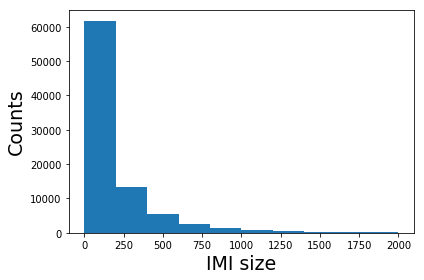

In [24]:
chrom_IMIs = []
for chrom in chrlist:
    subpos = ngenodf[ngenodf.Chrom==chrom]['Pos'].tolist()
    chrom_IMIs.append([cryptofxns.IMI(subpos[i],subpos[i+1]) for i in range(len(subpos)-1)])        

assert len(chrom_IMIs) == 14

allIMIs = np.concatenate(chrom_IMIs)

someIMIs = [imi for imi in allIMIs if imi <= 2000 ];
print " Total Number IMIs:", len(allIMIs)
print "        IMIs < 2kb:", len(someIMIs)
print "      % IMIs > 2kb:", round(100 * (1 - (float(len(someIMIs))/len(allIMIs))),3);
print "   Median IMI size:", np.median(allIMIs),"bp"

plt.hist(someIMIs);
plt.xlabel('IMI size',fontsize=19);
plt.ylabel('Counts',fontsize=19);
plt.tight_layout();
plt.savefig('../FIGS/Crypto-IMI-Hist-Nov2017.png',dpi=900)

## Save the new dataframe

In [ ]:
#ngenodf.to_csv('../FILES/FiltGenotoHapFiltGeno%s'%fileendname,index=False)